<a href="https://colab.research.google.com/github/nhyunaa/2025-1_CV/blob/main/2%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#2-1

In [71]:
img=cv.imread('/content/drive/MyDrive/HW2_img/Fig0309(a)(washed_out_aerial_image).tif')

def gamma(f,gamma=1.0): #감마보정코드
  f1=f/255.0
  return np.uint8(255*(f1**gamma))

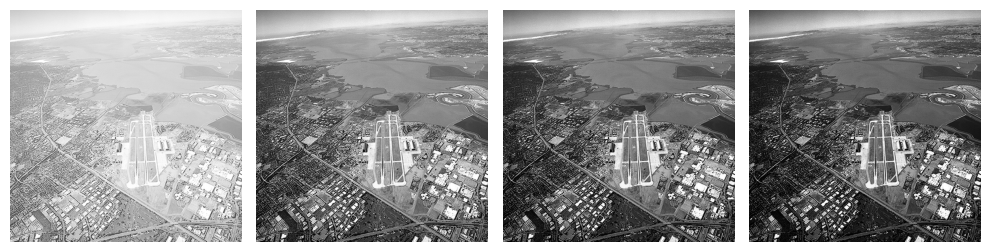

In [72]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1),plt.imshow(gamma(img, 1.0), cmap='gray'),plt.axis('off') #감마 = 1일때
plt.subplot(1, 4, 2),plt.imshow(gamma(img, 3.0),cmap='gray'),plt.axis('off') #감마 = 3일때
plt.subplot(1, 4, 3),plt.imshow(gamma(img, 4.0),cmap='gray'),plt.axis('off') #감마 = 4일때
plt.subplot(1, 4, 4),plt.imshow(gamma(img, 5.0),cmap='gray'),plt.axis('off') #감마 = 5일때

plt.tight_layout()
plt.show()

#감마값이 커질 수록 영상이 어두워 짐을 알 수 있다.

# 2-2

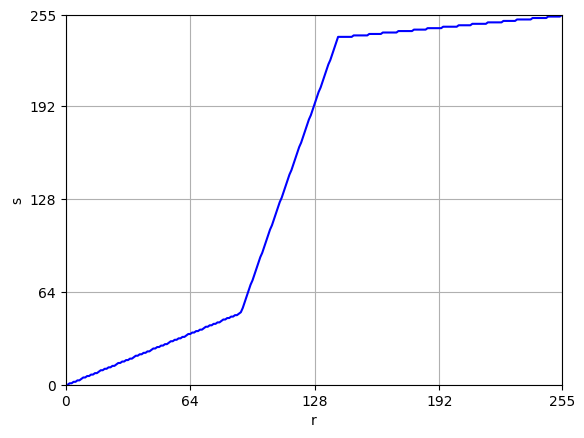

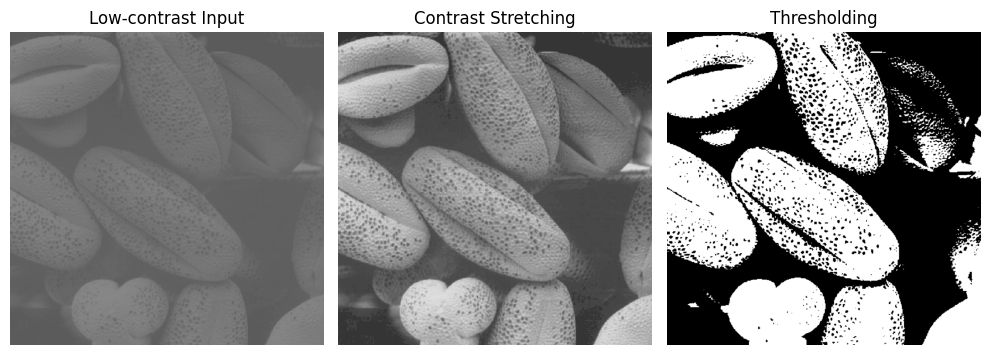

In [73]:
# Piecewise Linear Transformation 함수
def piecewise_linear_transformation(img, r1, s1, r2, s2):
    LUT = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        if i < r1:
            LUT[i] = (s1 / r1) * i
        elif r1 <= i < r2:
            LUT[i] = ((s2 - s1) / (r2 - r1)) * (i - r1) + s1
        else:
            LUT[i] = ((255 - s2) / (255 - r2)) * (i - r2) + s2
    lut_plot(LUT, r1, s1, r2, s2)
    return LUT[img]

# LUT 시각화 함수
def lut_plot(LUT, r1, s1, r2, s2, L=256):

    xticks = [0, int(L/4), int(L/2), int(3*L/4), L-1]
    xticklabels = [f'{0}', f'{int(L/4)}', f'{ int(L/2)}', f'{int(3*L/4)}', f'{L-1}']
    yticks = [0, int(L/4), int(L/2), int(3*L/4), L-1]
    yticklabels = [f'{0}', f'{int(L/4)}', f'{ int(L/2)}', f'{int(3*L/4)}', f'{L-1}']

    # 시각화
    plt.figure()
    plt.plot(np.arange(256), LUT.astype(np.float32), color='blue')  # float으로 변환
    plt.xlabel('r')
    plt.ylabel('s')
    plt.grid(True)
    plt.xticks(xticks, xticklabels)  # 사용자 정의 x축 레이블
    plt.yticks(yticks, yticklabels)  # 사용자 정의 x축 레이블

    plt.xlim([0, 255])
    plt.ylim([0, 255])
    plt.show()


# 이미지 로드 (grayscale)
img = cv2.imread('/content/drive/MyDrive/HW2_img/Fig0310(b)(washed_out_pollen_image).tif')

# 적용
img_low = img.copy()
#picewise linear transformation 을 적용한다.
contrast_stretched = piecewise_linear_transformation(img, r1=90, s1=50, r2=140, s2=240)
#tresholding을 적용하여 픽셀값이 110이상일때 255로 설정 하게 하고 이외에는 0으로 만들어 이진화를 시킨다.
thresholded = np.where(img >= 110, 255, 0).astype(np.uint8)

# 결과 출력
titles = ['Low-contrast Input', 'Contrast Stretching', 'Thresholding']
images = [img_low, contrast_stretched, thresholded]

plt.figure(figsize=(10, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

#결과적으로 low contrast 영상에  piecewise linear transformation을 적용하게 되면 원 영상보다 더 선명하고 뚜렷한 이미지로 변환된다.
#thresholding은 특정값을 기준으로 하여 영상을 이진화시킬수있음을 알 수 있다.


#2-3


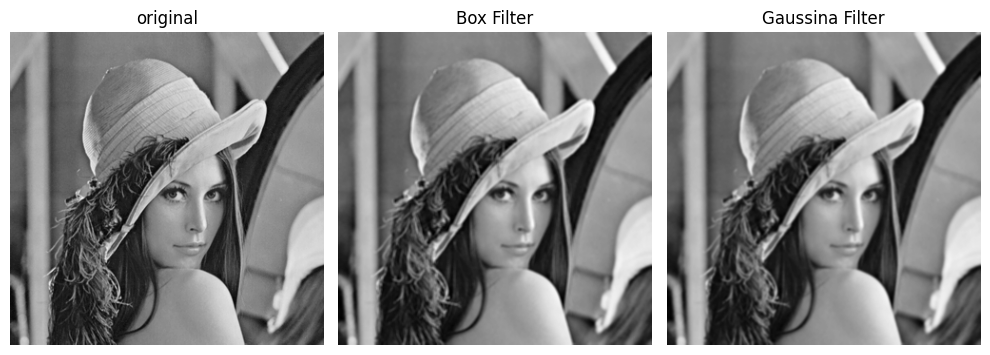

In [74]:
img = cv2.imread('/content/drive/MyDrive/HW2_img/Lenna.png', cv2.IMREAD_GRAYSCALE)

# 3x3 Box Filter정의
box_kernel = np.ones((3, 3), np.float32) / 9
#컨볼루션 수행
filtered_img = cv2.filter2D(img, -1, box_kernel)

#5x5 가우시안 필터정의
gaussian_kernel = np.array([
    [0.0030,  0.0133,  0.0219,  0.0133, 0.0030],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0219,0.0983,0.1621,0.0983,0.0219],
    [0.0133,0.0596,0.0983,0.0596,0.0133],
    [0.0030,0.0133,0.0219,0.0133,0.0030]
], dtype=np.float32)
# 커널정규화
gaussian_kernel /= np.sum(gaussian_kernel)
#컨볼루션 수행
gaussian_img = cv2.filter2D(img, -1, gaussian_kernel)

#이미지출력하기
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1),plt.imshow(img, cmap='gray'),plt.axis('off'),plt.title('original')
plt.subplot(1, 3, 2),plt.imshow(filtered_img, cmap='gray'),plt.axis('off'),plt.title('Box Filter')
plt.subplot(1, 3, 3),plt.imshow(gaussian_img, cmap='gray'),plt.axis('off'),plt.title('Gaussina Filter')

plt.tight_layout()
plt.show()



#BoxFilter는 동등하게 블러링 되며 가우시안 필터는 가우시안 분포에 따라 중심에 가까울 수록 더 큰 가중치를 부여해 엣지 부근을 살리려 하기에 상대적으로 형태가 덜 왜곡되며 노이즈를 줄인다.

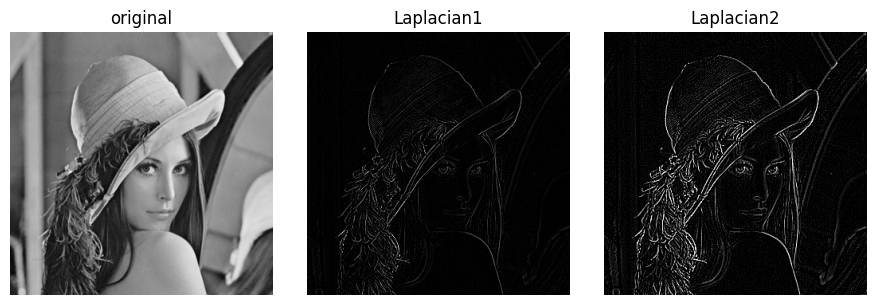

In [75]:
# 라플라시안 커널
kernel1 = np.array([
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
])
kernel2 = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

#커널적용 컨볼루션 수행
result1= cv2.filter2D(img, -1, kernel1)
result2 = cv2.filter2D(img, -1, kernel2)

#결과출력
plt.figure(figsize=(15,3))
plt.subplot(1,5,1), plt.imshow(img, cmap='gray'),plt.axis('off'),plt.title('original')
#라플라시안 필터는 이미지의 경계선,엣지를 detection 하는데 사용되는 필터로 경계선을 더 뚜렷하게 만들 수 있지만 노이즈도 함께 강조할 수 있다는 단점이 존재한다.
#커널1은 3*3 필터에서 위/아래 /좌/우 4방향의 차이만 계산한다.
plt.subplot(1,5,2), plt.imshow(result1, cmap='gray'),plt.axis('off'),plt.title('Laplacian1')
#반면 커널2는 3*3의 필터에서 모든방향, 즉 8방향의 변화를 감지하여 커널1 보다 더 강하게 엣지를 강조하여 더 뚜렷하게 검출된다.
plt.subplot(1,5,3), plt.imshow(result2, cmap='gray'),plt.axis('off'),plt.title('Laplacian2')


plt.tight_layout()
plt.show()


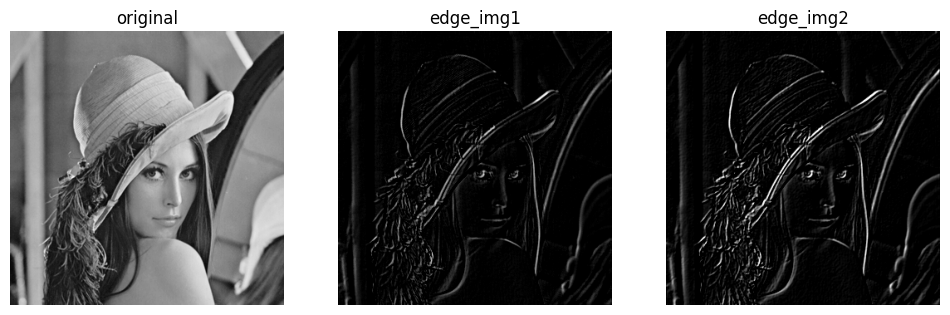

In [76]:
#커널 정의
#첫번째커널 : 45도 방향 엣지
edge_kernel = np.array([
    [-1, 0, 0],
    [ 0, 0, 0],
    [ 0, 0, 1]
], dtype=np.float32)

#두번째 커널 : 1보다 조금 더 다양한 방향의 엣지
edge_kernel2 = np.array([
    [-1, -1, 0],
    [ -1, 0, 1],
    [ 0, 1, 1]
], dtype=np.float32)

# 필터 적용
edge_img = cv2.filter2D(img, -1, edge_kernel)
edge_img2 = cv2.filter2D(img, -1, edge_kernel2)


plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(img, cmap='gray'),plt.axis('off'),plt.title('original')
plt.subplot(1,3,2), plt.imshow(edge_img, cmap='gray'),plt.axis('off'),plt.title('edge_img1')
plt.subplot(1,3,3), plt.imshow(edge_img2, cmap='gray'),plt.axis('off'),plt.title('edge_img2')
plt.show()

#커널정의 에서 볼수 있듯 결과에서도 필터1을 적용한 영상보다 필터2를 적용한 영상에서 더 많은 방향의 엣지를 검출 하며 더많은 엣지를 강조하고 상대적으로 대비가 더 큰 특징이 있다.

#2-4

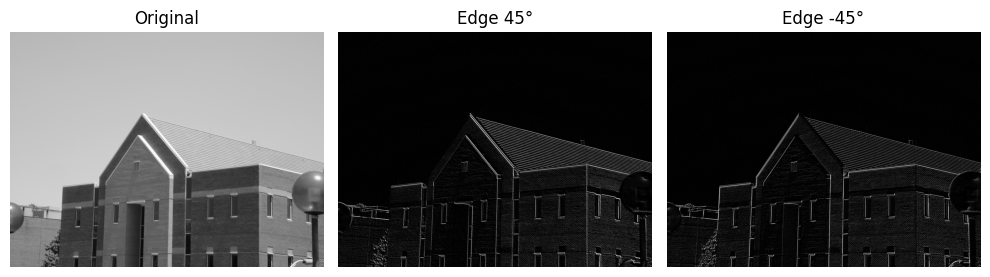

In [77]:
img = cv2.imread('/content/drive/MyDrive/HW2_img/school.jpg', cv2.IMREAD_GRAYSCALE)

# 소벨 연산자 변형45° 방향 필터
sobel_45 = np.array([
    [0, 1, 2],
    [-1, 0, 1],
    [-2, -1, 0]
], dtype=np.float32)

# 소벨 연산자 변형-45 방향 필터
sobel_neg45 = np.array([
    [2, 1, 0],
    [1, 0, -1],
    [0, -1, -2]
], dtype=np.float32)

# 필터 적용
edge_45 = cv2.filter2D(img, -1, sobel_45)
edge_neg45 = cv2.filter2D(img, -1, sobel_neg45)

# 시각화
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1),plt.imshow(img, cmap='gray'),plt.title('Original'),plt.axis('off')
#45도 필터는 왼쪽 위에서 오른쪽 아래로의 변화를 강조하기 때문에 이 방향으로 경계가 뚜렷하게 보인다.
plt.subplot(1, 3, 2),plt.imshow(edge_45, cmap='gray'),plt.title('Edge 45°'),plt.axis('off')
#-45도 필터는 왼쪽 아래에서 오른쪽 위로의 변화를 강조하기 때문에 이 방향으로 경계가 뚜렷하게 보인다.
plt.subplot(1, 3, 3),plt.imshow(edge_neg45, cmap='gray'),plt.title('Edge -45°'),plt.axis('off')
#필터의 방향이 아닌 방향에서는 경계가 덜 강조된다.
plt.tight_layout()
plt.show()


#2-5

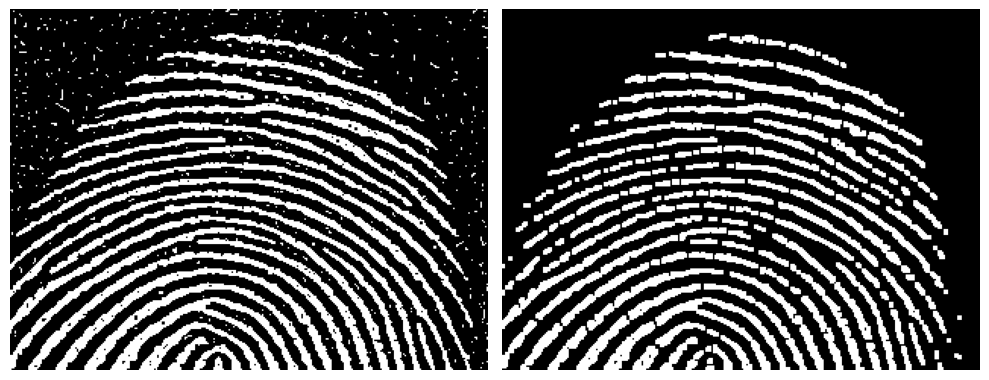

In [78]:
img = cv2.imread('/content/drive/MyDrive/HW2_img/finger.jpg', cv2.IMREAD_GRAYSCALE)

# 이진화
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 구조 요소 정의
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# 모폴로지연산 OPENING 연산 수행
erosion = cv2.erode(binary, kernel) #객체를 축소시킴
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel) #열림연산을 통해서  노이즈를 제거하여 지문 영상을 개선할 수 있다.

# 결과 시각화
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1), plt.imshow(binary, cmap='gray'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(opened, cmap='gray'), plt.axis('off')

plt.tight_layout()
plt.show()


#2-6

(<Axes: title={'center': 'Erosion'}>,
 (np.float64(-0.5), np.float64(485.5), np.float64(485.5), np.float64(-0.5)),
 Text(0.5, 1.0, 'Erosion'))

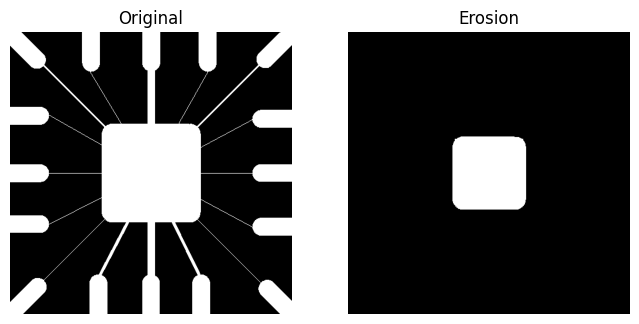

In [79]:
img = cv2.imread('/content/drive/MyDrive/HW2_img/Fig0905(a)(wirebond-mask).tif', cv2.IMREAD_GRAYSCALE)

# 구조 요소 정의
se = np.ones((45, 45), np.uint8)

# 침식연산으로 가장 자리가 깎이고 축소 시킬 수 있다.
b_erosion = cv2.erode(img, se, iterations=1)
# 구조요소를 45X45로 정의한 결과 선이 사라지고 어두운 부분이 확장되며 밝은 부분이 줄어듬을 확인 할 수 있다.

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1),plt.imshow(img, cmap='gray'),plt.axis('off'),plt.title('Original')
plt.subplot(1, 2, 2),plt.imshow(b_erosion, cmap='gray'),plt.axis('off'),plt.title('Erosion')



#2-7

In [80]:
img = cv2.imread('/content/drive/MyDrive/HW2_img/Fig0939(a)(headCT-Vandy).tif', cv2.IMREAD_GRAYSCALE)
#1. Sobel
#소벨 필터 적용
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # x방향
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # y방향
#에지 크기 계산 -기울기
sobel_edge = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_edge = np.uint8(np.clip(sobel_edge, 0, 255))


In [81]:
#2. Laplacian
# 가우시안
blurred = cv2.GaussianBlur(img, (3, 3), 0)
# 라플라시안 적용
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

In [82]:
#3. Canny
# Canny 적용
canny_edge = cv2.Canny(img, threshold1=100, threshold2=200)


#4. Morphological Gradient
# 구조 요소(3ㅌ3)
se = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# 팽창, 침식
dilation = cv2.dilate(img, se)
erosion = cv2.erode(img, se)
# Morphological Gradient 계산
morphological_gradient = cv2.subtract(dilation, erosion)

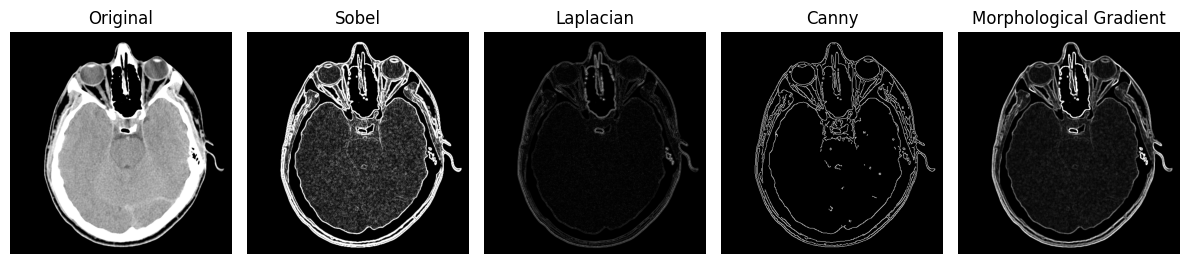

In [83]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 5, 1), plt.imshow(img, cmap='gray'), plt.title('Original'),plt.axis('off')
plt.subplot(1, 5, 2), plt.imshow(sobel_edge, cmap='gray'), plt.title('Sobel'),plt.axis('off')
plt.subplot(1, 5, 3), plt.imshow(laplacian, cmap='gray'), plt.title('Laplacian'),plt.axis('off')
plt.subplot(1, 5, 4), plt.imshow(canny_edge, cmap='gray'), plt.title('Canny'),plt.axis('off')
plt.subplot(1, 5, 5), plt.imshow(morphological_gradient, cmap='gray'), plt.title('Morphological Gradient'),plt.axis('off')

plt.tight_layout()
plt.show()

#아래의 결과로 보아 엣지검출에 가장 뛰어난 성능은 Canny알고리즘이라 생각한다. sobel 알고리즘은 엣지가 뚜껍게 검출 되는 것 같으며 노의즈가 포함 되어있다.
#Laplacian알고리즘은 흐릿해 보이며 Morphological Gradient 알고리즘은 상대적으로 경계가 Canny 알고리즘 만큼 명확하지는 않음을 볼 수 있다 .


#2-8

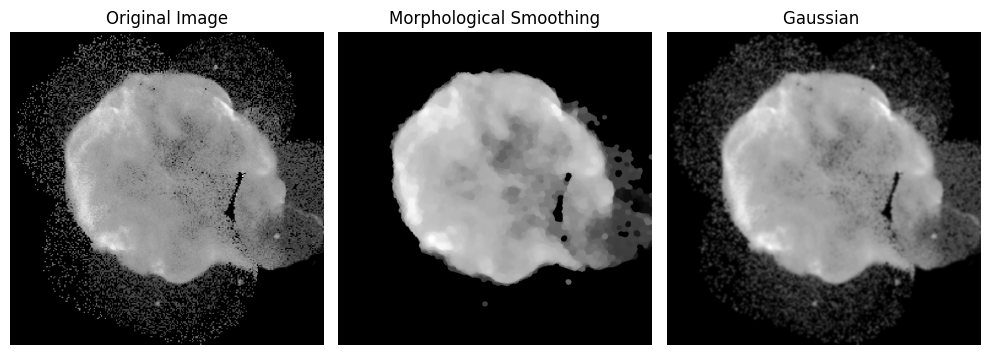

In [84]:
img = cv.imread('/content/drive/MyDrive/HW2_img/Fig0938(a)(cygnusloop_Xray_original).tif', cv2.IMREAD_GRAYSCALE)


#1. Morphological Smoothing
# 구조 요소 정의 (9X9)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))

# 열기 (Opening) 연산: 침식 후 팽창
opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)

# 2. 가우시안 필터 (9X9)
gaussian_blur = cv2.GaussianBlur(img, (9, 9), 0)

plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1),plt.imshow(img, cmap='gray'),plt.title('Original Image'),plt.axis('off')
plt.subplot(1, 3, 2),plt.title('Morphological Smoothing'),plt.imshow(closed, cmap='gray'),plt.axis('off')
plt.subplot(1, 3, 3),plt.title('Gaussian '),plt.imshow(gaussian_blur, cmap='gray'),plt.axis('off')
plt.tight_layout()
plt.show()

#같은 크기의 필터지만 모폴로지 스무딩은 아래와 같이 소금-후추 노이즈에 강하기에 아래와같은 예시에 적합하다.
#반면 가우시안 필터를 적용한 결과를 보면 전체적으로 스무딩 효과가 일어났지만 노이즈라 생각되는 작은 점들을 제거하지는 못함을 볼 수 있다.

#2-9

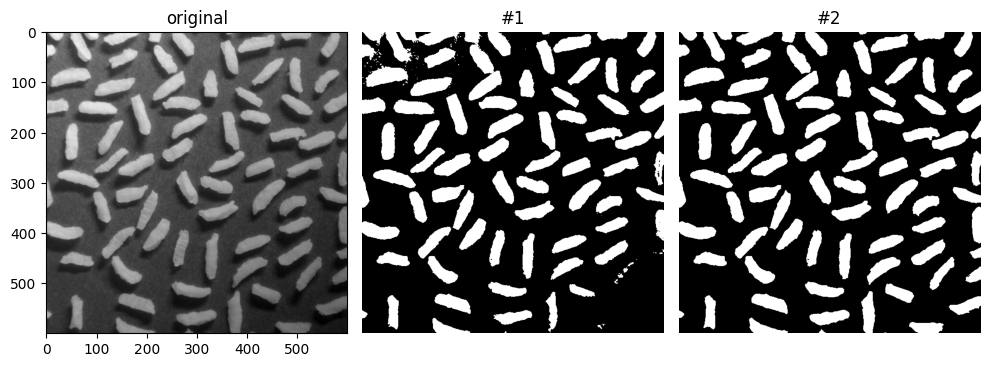

In [85]:
img = cv.imread('/content/drive/MyDrive/HW2_img/Fig0940(a)(rice_image_with_intensity_gradient).tif', cv2.IMREAD_GRAYSCALE)

#1.Otsu 이진화
# Otsu 이진화 적용
_, otsu_thresholded = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#2.Top-hat 변환 결과 영상에 대한 Otsu 이진화

# 구조 요소 정의
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (90, 90))

# 열림 연산 적용: 객체제거 배경추출
opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Top-hat ->  배경제거후 원본에서 배경을 뺌
top_hat = cv2.subtract(img, opened)

# Otsu 이진화 적용
_, otsu_thresholded2 = cv2.threshold(top_hat, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(10,5))

plt.subplot(1, 3, 1),plt.imshow(img, cmap='gray'),plt.axis('off'),plt.title('original'),plt.axis('ON')
#균일하지 않은 조명 아래에서 촬영된 영상에 otsu 이진화를 적용하면 어두운 부분에서의 이진화가 제대로 되지않는다.
plt.subplot(1, 3, 2),plt.imshow(otsu_thresholded, cmap='gray'),plt.axis('off'),plt.title('#1')
#불균형한 밝기의영상을 먼저 추출한 뒤 원본에서 이를 제거하여 배경의 밝기를 균등하게 만들어 이진화를 수행한다.
#이때의 이진화는 잘 수행되는 것을 알 수 있다.
plt.subplot(1, 3, 3),plt.imshow(otsu_thresholded2, cmap='gray'),plt.axis('off'),plt.title('#2')

plt.tight_layout()
plt.show()


#2-10

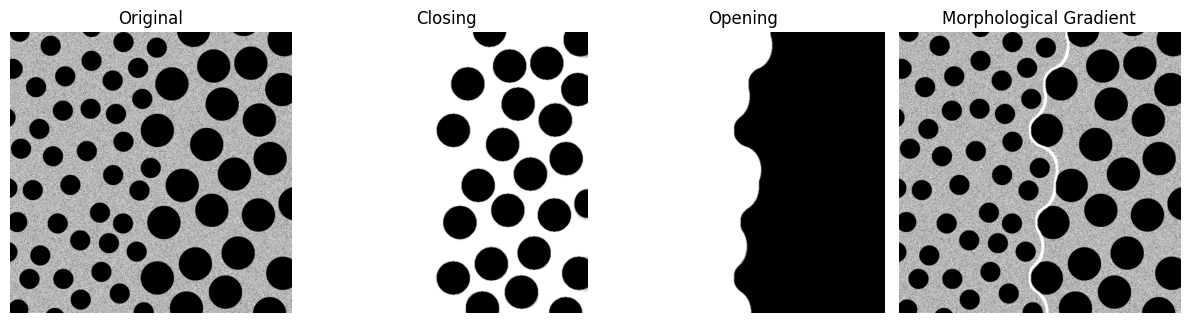

In [86]:
# (a)
img = cv2.imread('/content/drive/MyDrive/HW2_img/Fig0943(a)(dark_blobs_on_light_background).tif',cv2.IMREAD_GRAYSCALE)

# 1. small blobs removed by closing (a)
# 구조 요소 정의
kernel_close = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (55, 55))
#a에 대해 닫힘연산 수행
#  큰 구조 요소를 사용하여 밝은 배경영역을 확장시켜 어두운 작은 원이 사라짐
closed_img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel_close)


# 2.  열림 연산 (Opening)
# 구조 요소정의
kernel_open = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (80, 100))
#더 큰 구조요소를 사용하여 밝은 부분을 없앰
opened_img = cv2.morphologyEx(closed_img, cv2.MORPH_OPEN, kernel_open)

# 3. Morphological Gradient
 # 작은 구조 요소를 통해서 원의 경계를 추출
kernel_gradient = np.ones((5, 5), np.uint8)
gradient_img = cv2.morphologyEx(opened_img, cv2.MORPH_GRADIENT, kernel_gradient)
#원본영상과 더하여 물체의 경계를 나누는 영상을 만듬
morphological = cv2.add(img, gradient_img)

# 4. 결과 출력
plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1), plt.imshow(img, cmap='gray'), plt.title('Original'),plt.axis('off')
plt.subplot(2, 4, 2), plt.imshow(closed_img, cmap='gray'), plt.title('Closing'), plt.axis('off')
plt.subplot(2, 4, 3), plt.imshow(opened_img, cmap='gray'), plt.title('Opening'), plt.axis('off')
plt.subplot(2, 4, 4), plt.imshow(morphological, cmap='gray'), plt.title('Morphological Gradient'), plt.axis('off')

plt.tight_layout()
plt.show()
